# Heart Disease Prediction

The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions.

In [9]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb

## Loading the datasets

In [10]:

train_data = pd.read_csv("Train Dataset .csv")
test_data = pd.read_csv("Test Dataset.csv")
var = pd.read_csv("Variable_Definitions.csv") 
sub = pd.read_csv("Sample Submission.csv")


In [11]:
train_data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [12]:
test_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [13]:
train_data.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
train_data.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset has no missing values

###  Rename the columns in the DataFrame

In [15]:

test_data.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)


### Concatenating the train and test dataframe

In [16]:

train_data["targ"] = "train"
test_data["targ"] = "test"

In [17]:
train_data

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,train
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,train
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,train
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,train
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0,train
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1,train
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1,train
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1,train


In [18]:
df = pd.concat([train_data, test_data], ignore_index=True)
df.shape

(10000, 16)

In [19]:
df.head(1)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1.0,train


In [20]:
train_data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,train
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,train
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,train
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,train
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,train


In [21]:
train_data.shape, test_data.shape 

((7303, 16), (2697, 15))

### Exploratory Data Analysis

In [22]:
# Define the categorical features for easy data manipulation and EDA
cat_cols = ['Sex', 'cp', 'fbs', 'exang', 'slope']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [23]:
df.isnull().sum()

Id             0
Age            0
Sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target      2697
targ           0
dtype: int64

checking the distribution of the target variable

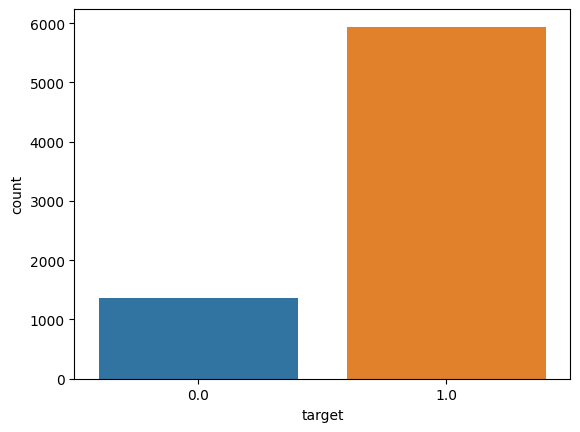

In [24]:
sns.countplot(x=df['target']);  

### Feature Engineering

In [25]:
# function to group the ages into bins
def group_age(x):
    if x < 30:
        return 'Young'
    elif 30 <= x < 40:
        return 'Adult'
    elif 40 <= x < 60:
        return 'Middle Age'
    else:
        return 'Old'

df['Age_bin'] = df['Age'].apply(group_age)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        10000 non-null  int64  
 1   Age       10000 non-null  int64  
 2   Sex       10000 non-null  object 
 3   cp        10000 non-null  object 
 4   trestbps  10000 non-null  int64  
 5   chol      10000 non-null  int64  
 6   fbs       10000 non-null  object 
 7   restecg   10000 non-null  int64  
 8   thalach   10000 non-null  int64  
 9   exang     10000 non-null  object 
 10  oldpeak   10000 non-null  float64
 11  slope     10000 non-null  object 
 12  ca        10000 non-null  int64  
 13  thal      10000 non-null  int64  
 14  target    7303 non-null   float64
 15  targ      10000 non-null  object 
 16  Age_bin   10000 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 1.3+ MB


### Data Preprocessing

In [27]:
#label encoding the categorical columns
cat_cols.append('Age_bin')
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ,Age_bin
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1.0,train,0
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0.0,train,1
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1.0,train,0
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1.0,train,2
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1.0,train,0


In [29]:
train_data.head(2)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,train
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,train


In [30]:
train_data = df[df["targ"] == "train"].drop(["targ", "Age", "Id"], axis=1)
test_data = df[df["targ"] == "test"].drop(["targ", "target", "Age", "Id"], axis=1)

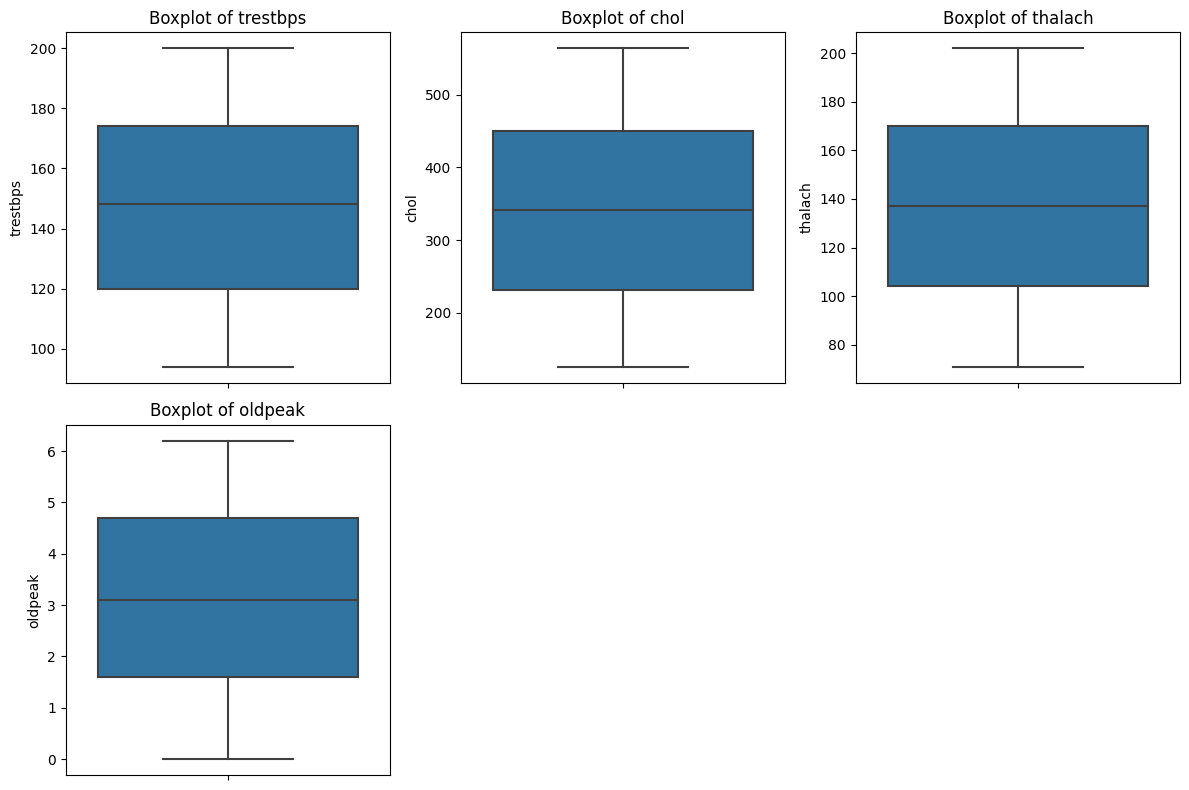

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = [ 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create boxplots to visualize outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_data, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [32]:
# Define the function to handle outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows with outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply IQR method for each continuous feature
for feature in continuous_features:
    train_data = remove_outliers_iqr(train_data, feature)

# Check the number of rows after removing outliers
print(train_data.shape)


(7303, 14)


In [33]:
X = train_data.drop(columns=["target"])
X.head()

,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age_bin
0,0,1,158,205,1,0,154,0,1.5,1,4,1,0
1,1,2,198,154,0,1,104,0,0.8,2,1,0,1
2,1,2,101,202,1,0,155,0,2.1,1,3,1,0
3,0,0,113,306,1,2,88,1,4.9,0,2,2,2
4,1,2,139,419,1,1,166,1,0.9,2,4,0,0


In [34]:
y = train_data["target"]
print(y.value_counts())

target
1.0    5941
0.0    1362
Name: count, dtype: int64


In [35]:
X.isnull().sum()

Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Age_bin     0
dtype: int64

In [36]:
y.isnull().sum()

0

In [37]:
df.isnull().sum()

Id             0
Age            0
Sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target      2697
targ           0
Age_bin        0
dtype: int64

In [38]:
test_data.isnull().sum()

Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Age_bin     0
dtype: int64

Split the data into train and test sets

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape

((5842, 13), (1461, 13))

In [41]:
y_train.shape, y_test.shape

((5842,), (1461,))

In [42]:
# resampling the data using SMOTE because the target variable is imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

 #Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
target
1.0    5941
0.0    1362
Name: count, dtype: int64

Class distribution after SMOTE:
target
1.0    4740
0.0    4740
Name: count, dtype: int64


In [43]:
 #Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
target
1.0    5941
0.0    1362
Name: count, dtype: int64

Class distribution after SMOTE:
target
1.0    4740
0.0    4740
Name: count, dtype: int64


### Model Building

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Model Training with XGBoost

In [46]:

model = xgb.XGBClassifier()
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### model evaluation

In [47]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

         0.0       0.39      0.03      0.06       260
         1.0       0.83      0.99      0.90      1201

    accuracy                           0.82      1461
   macro avg       0.61      0.51      0.48      1461
weighted avg       0.75      0.82      0.75      1461



In [48]:
# Evaluate on train and test data
acc_train = model.score(X_resampled, y_resampled)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)

Training Accuracy: 0.9872362869198312
Test Accuracy: 0.8186173853524983


making predictions on the test data

In [49]:
test_pred = model.predict(test_data)  

In [50]:
test_pred

array([1, 1, 1, ..., 1, 1, 0])

In [51]:
sub.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [52]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'], 
    'Target': test_pred
})

# Save the submission DataFrame to a CSV file
submission.to_csv('XGBClassifier001.csv', index=False)

### Using standard scaler, Logistic Regression

In [53]:
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
model1 = LogisticRegression()


model1.fit(X_resampled, y_resampled)

test_data = scaler.transform(test_data)


y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.37      1.00      0.54       260
         1.0       1.00      0.63      0.77      1201

    accuracy                           0.69      1461
   macro avg       0.68      0.81      0.66      1461
weighted avg       0.89      0.69      0.73      1461



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [56]:
# Evaluate on train and test data
acc_train = model.score(X_resampled, y_resampled)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)

Training Accuracy: 0.9872362869198312
Test Accuracy: 0.8186173853524983


In [57]:
test_pred = model1.predict(test_data)  

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
sub['id'] = test_pred
sub.head()

,Id,id
0,16501,1.0
1,10444,1.0
2,14288,1.0
3,10409,1.0
4,17330,0.0


In [59]:
sub.to_csv('LogisticRegression001.csv', index=False)

In [60]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store out-of-fold predictions and scores
fold_pred = []   
oof_pred = []

# Set hyperparameters for the classifier
params = {
    'learning_rate': 0.163251453473545997,
    'max_depth': 14,
    'subsample': 0.6530887571489526,
    'loss_function': 'Logloss',  
    'eval_metric': 'Accuracy'  # Metric for evaluating model performance during training
}

# Create a KFold with 7 splits and set the random state
fold = KFold(n_splits=7, shuffle=True, random_state=150)

# Start the KFold process
for i, (train_index, test_index) in enumerate(fold.split(X, y), start=1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the CatBoost Classifier
    model = CatBoostClassifier(**params)
    model.fit(
        X_resampled, y_resampled,
        eval_set=[(X_resampled, y_resampled), (X_test, y_test)],
        early_stopping_rounds=200, 
        verbose=False
    )

    # Make probability predictions on the test set
    preds_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    preds = (preds_proba >= 0.5).astype(int)  # Convert probabilities to 0 or 1 based on threshold 0.5

    # Calculate and print the accuracy error for the fold
    accuracy = accuracy_score(y_test, preds)
    print(f"Fold {i} accuracy: {accuracy}")
    oof_pred.append(accuracy)

    # Predict on test_data using probabilities and convert to 0 or 1
    test_proba = model.predict_proba(test_data)[:, 1]
    test_preds = (test_proba >= 0.5).astype(int)
    fold_pred.append(test_preds)




Fold 1 accuracy: 0.8237547892720306
Fold 2 accuracy: 0.8122605363984674
Fold 3 accuracy: 0.8360498561840843
Fold 4 accuracy: 0.8312559923298178
Fold 5 accuracy: 0.8245445829338447
Fold 6 accuracy: 0.8101629913710451
Fold 7 accuracy: 0.8331735378715245


In [61]:
# Convert fold_pred to a 2D array for aggregation
fold_pred_array = np.array(fold_pred)  # Shape: (n_folds, n_samples)

# Combine predictions using mean across folds
final_preds_proba = fold_pred_array.mean(axis=0)  # Mean probability across folds
final_preds = (final_preds_proba >= 0.5).astype(int)  # Convert to binary predictions


sub['id'] = final_preds 



In [62]:
sub.head()

,Id,id
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1


In [63]:
# Save the DataFrame to a CSV file
sub.to_csv('Catboost_kfold_submission.csv', index=False)


In [64]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping



scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize the ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_resampled_scaled.shape[1]))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(X_resampled_scaled, y_resampled, 
                    validation_split=0.1, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on test data
test_predictions = model.predict(X_test_scaled)
test_predictions_classes = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, test_predictions_classes)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, test_predictions_classes))



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7199 - loss: 0.5665 - val_accuracy: 0.8163 - val_loss: 0.3784
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8176 - loss: 0.3509 - val_accuracy: 0.8067 - val_loss: 0.3183
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8081 - loss: 0.3088 - val_accuracy: 0.8131 - val_loss: 0.3000
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8069 - loss: 0.3003 - val_accuracy: 0.8275 - val_loss: 0.2867
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8123 - loss: 0.2845 - val_accuracy: 0.8131 - val_loss: 0.2820
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8143 - loss: 0.2781 - val_accuracy: 0.7971 - val_loss: 0.2774
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8256 - loss: 0.2658 - val_accuracy: 0.8035 - val_loss: 0.2763
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8246 - loss: 0.2638 - val_accu

In [65]:
# Make predictions on the actual test dataset
final_test_predictions = model.predict(scaler.transform(test_data))
final_test_predictions_classes = (final_test_predictions > 0.5).astype(int)

# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'], 
    'Target': final_test_predictions_classes.flatten()  
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission_ann003.csv', index=False)


39/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



In [69]:
%%time

lg_params = {
    'penalty':['l1','l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':['saga'],
    'class_weight':['balanced']}

lg_gs = GridSearchCV(LogisticRegression(random_state=12345),
                 lg_params,
                 cv = 5,
                 scoring = 'roc_auc')
lg = lg_gs.fit(X_resampled, y_resampled)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

CPU times: total: 18.4 s
Wall time: 19.1 s


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
%%time
dt_params = {
    'max_depth': [2, 4, 8, 16],
    'min_samples_split': range(5,55,10), 
    'min_samples_leaf': [2, 3, 5, 10],
    'class_weight':['balanced']
}

dt_gs_auc = GridSearchCV(DecisionTreeClassifier(random_state=12345),
                         dt_params, n_jobs=-1, cv = 5, scoring = 'roc_auc')
dt_auc = dt_gs_auc.fit(X_resampled, y_resampled)

CPU times: total: 1.22 s
Wall time: 14.4 s


In [ ]:
%%time
rf_params = {
    'criterion':['gini','entropy'],
    'n_estimators': [2, 5, 10, 30, 50],
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': [2,3,5,10],
    'class_weight':['balanced']
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=12345),
                     rf_params, cv = 5, scoring = 'roc_auc',
                     verbose=2)
rf_auc = rf_gs.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=5; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=5; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=5; total time=   0.0s
[CV] END 

In [ ]:
cls = RandomForestClassifier(random_state=12345, max_depth=16, n_estimators=50, min_samples_leaf=10, criterion='gini', class_weight='balanced')
cls.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_leaf=10, n_estimators=50,
                       random_state=12345)

In [ ]:
grb = GradientBoostingClassifier(random_state=12345)
grb.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=12345)

In [ ]:
predictions2 = cls.predict(test_data)

 
sub['id'] = predictions
sub.to_csv('cls007.csv', index=False)


In [ ]:
predictions1 = lg.predict(test_data)

 
sub['id'] = predictions
sub.to_csv('lg006.csv', index=False)


In [ ]:
predictions = grb.predict(test_data)

 
sub['id'] = predictions
sub.to_csv('004.csv', index=False)


In [ ]:
predictions3 = rf_gs.predict(test_data)

 
sub['id'] = predictions
sub.to_csv('rf_gs008.csv', index=False)


In [ ]:
predictions4 = dt_auc.predict(test_data)

 
sub['id'] = predictions
sub.to_csv('dt_auc.csv', index=False)
